In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.pandas.set_option("display.max_columns",None) ## Display all the columns if there millions

In [5]:
dataset=pd.read_csv(r"E:\CODEZ\Data Science\Data Sets\house_prediction_train.csv")

In [8]:
dataset.shape

(1460, 81)

In [9]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##### In Data Analysis We will Analze to Find out the below stuff
1.Missing Values

2.All the Numerical Values

3.Distribution of the Numerical Values

4.Categorical Variables

5.Cardibility of Categorical Variables

6.Outliers

7.Relationship between independent and dependent features

# 1.Missing Values

In [27]:
dataset["LotFrontage"].isnull().sum() ## hOW MANY Non Values in that column. Total

259

In [34]:
dataset["LotFrontage"].count() ## Total number of Not null values

1201

In [35]:
np.round(256/1201,5)

0.21316

In [37]:
dataset["LotFrontage"].notnull().sum()

1201

In [40]:
dataset["LotFrontage"].mean()

70.04995836802665

In [44]:
np.round(dataset["LotFrontage"].isnull().mean(),4) ##all non values equals to 1. then it devides by total data.. 259 non values/1460 columns

0.1774

df.isnull()

#Mask all values that are NaN as True

df.isnull().mean()

#compute the mean of Boolean mask (True evaluates as 1 and False as 0)

df.isnull().mean().sort_values(ascending = False)

#sort the resulting series by column names descending


That being said a column that has values:

[np.nan, 2, 3, 4]
is evaluated as:

[True, False, False, False]
interpreted as:

[1, 0, 0, 0]
Resulting in:

0.25

In [45]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]

for features in features_with_na:
    print(features,np.round(dataset[features].isnull().mean(),4), "%  Missing Values ")

LotFrontage 0.1774 %  Missing Values 
Alley 0.9377 %  Missing Values 
MasVnrType 0.0055 %  Missing Values 
MasVnrArea 0.0055 %  Missing Values 
BsmtQual 0.0253 %  Missing Values 
BsmtCond 0.0253 %  Missing Values 
BsmtExposure 0.026 %  Missing Values 
BsmtFinType1 0.0253 %  Missing Values 
BsmtFinType2 0.026 %  Missing Values 
FireplaceQu 0.4726 %  Missing Values 
GarageType 0.0555 %  Missing Values 
GarageYrBlt 0.0555 %  Missing Values 
GarageFinish 0.0555 %  Missing Values 
GarageQual 0.0555 %  Missing Values 
GarageCond 0.0555 %  Missing Values 
PoolQC 0.9952 %  Missing Values 
Fence 0.8075 %  Missing Values 
MiscFeature 0.963 %  Missing Values 


# Since they are many missing values, we need to find the relationship between missing values and Sales Price.If there is not a relationship, we can drop that column

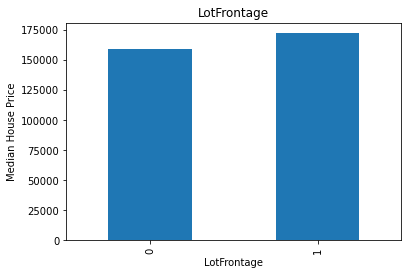

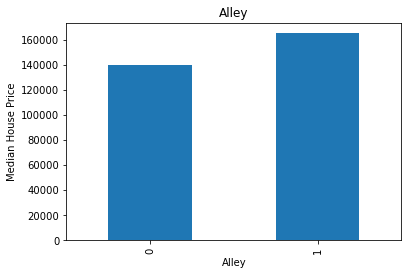

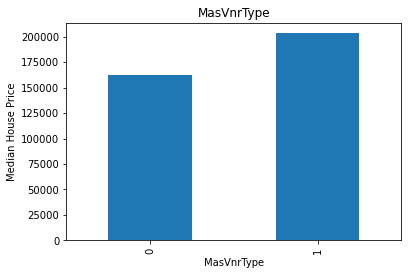

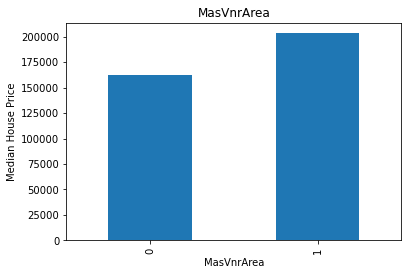

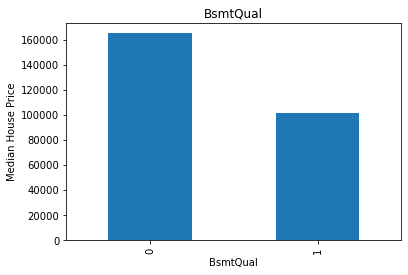

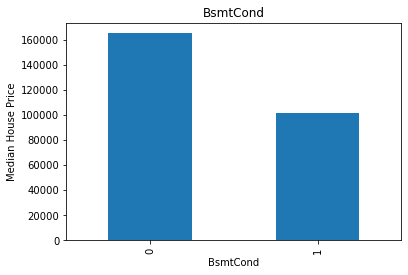

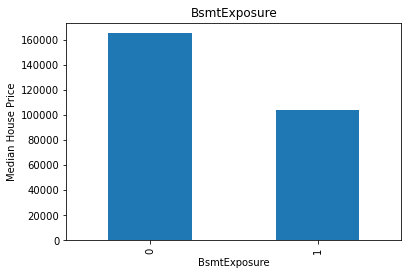

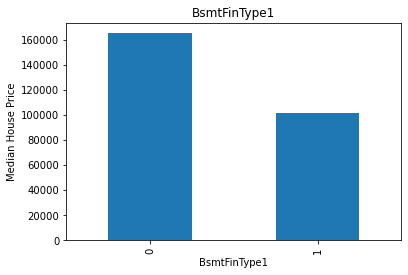

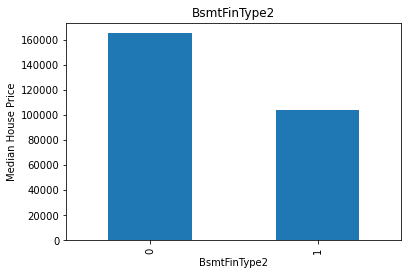

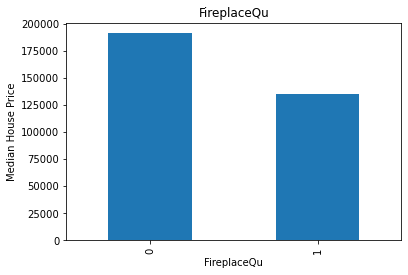

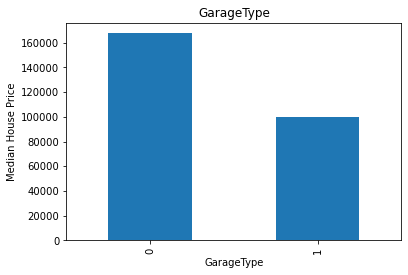

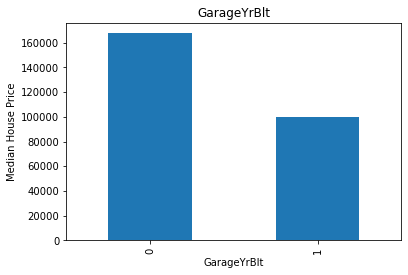

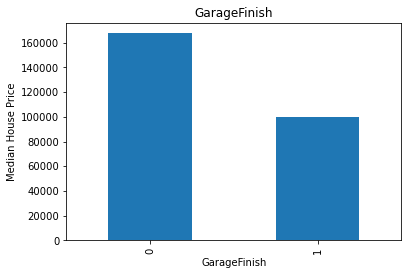

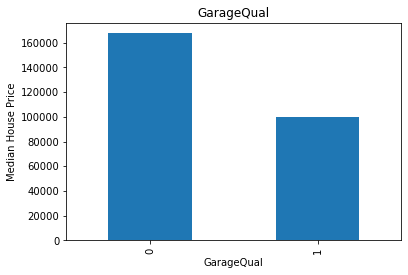

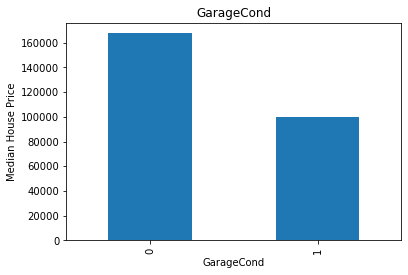

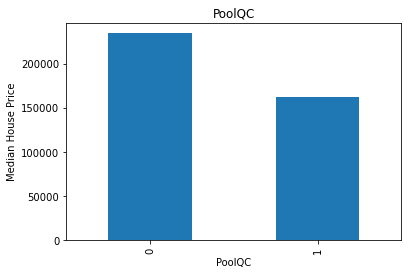

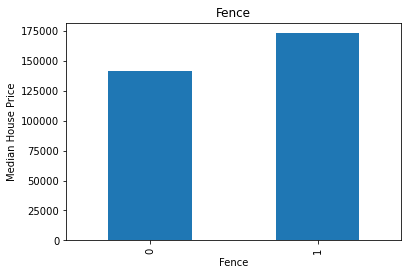

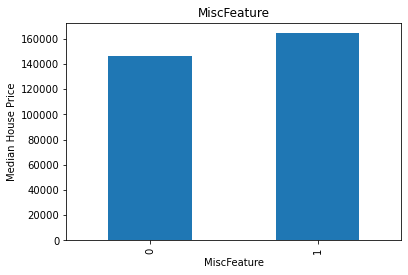

In [101]:
for features in features_with_na:
    data = dataset.copy()
    
    data[features] = np.where(data[features].isnull(),1 , 0) #if data is null then its 1 and otherwise its zero
    
    data.groupby(features)['SalePrice'].median().plot.bar() ## Features anuwa group krnna. ethokot features walat adalaw sales prices wala median enawa. Non values wala median and Not non values wala median eka ganna pluwn
    plt.title(features)
    plt.ylabel("Median House Price")
    plt.show()

In [86]:
check=dataset.loc[dataset["LotFrontage"].isnull(),"SalePrice"]

In [87]:
check.median() ## Lost Frontage null values wala salePrices wala Median eka

172400.0

In [88]:
checks=dataset.loc[dataset["LotFrontage"].notnull(),"SalePrice"]

In [89]:
checks.median()

159500.0

In [90]:
dataset["GarageQual"].isnull().sum()

81

# We can not remove any features. Because every feature is doing a major Role

Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

From the above dataset some of the features like Id is not required

# Numerical Variables

In [100]:
numerical_variables=[features for features in dataset.columns if dataset[features].dtypes !="O"] #O means Object.It means we select features are not objects/ not categorical/not string
print("Number of Numerical Variables:",len(numerical_variables)) #check how many numerical variables are in our list
dataset[numerical_variables].head()

Number of Numerical Variables: 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
